# Project : Anticipate the Electricity Consumption Needs of Buildings

## 1. Business Understanding

### 1.1 Project description

The City of Seattle has committed to becoming carbon neutral by 2050, a critical step in mitigating climate change and reducing

carbon emissions. To achieve this goal, the City has embarked on a comprehensive project to assess and forecast the carbon 

emissions and energy consumption of its buildings. This project aims to provide a data-driven solution that will enable the 

city to make informed decisions regarding energy efficiency and carbon reduction. The project is divided into several key 

phases, beginning with data pre-processing and ending with an evaluation of the impact of the ENERGY STAR rating.

### 1.2 Project objectives

1. Data Preprocessing:

Objective: To prepare and clean the building energy benchmarking data for analysis.

Concatenation of Data: Combine building energy benchmarking data from 2015 and 2016 to create a comprehensive dataset.
Data Cleaning: Identify and handle missing values, outliers, and inconsistencies in the data.
Selection of Important Variables: Choose relevant features that are expected to influence energy consumption and CO2 emissions.
Data Analysis: Perform exploratory data analysis to gain insights into the dataset, such as trends, distributions, and correlations.
Data Preparation: Preprocess the data for modeling, which includes feature engineering, encoding categorical variables, and splitting the data into training and testing sets.

2. Predict Total Energy Consumption:

Objective: Develop a predictive model for total energy consumption based on building characteristics.

Select an appropriate regression model for predicting total energy consumption.
Train the model using the prepared dataset and evaluate its performance using appropriate metrics (e.g., Mean Absolute Error, Root Mean Square Error).
Fine-tune the model for better accuracy.

3. Predict Energy Source Proportions:

Objective: Predict the proportion of each energy source (e.g., electricity, gas) used by buildings.

Use the same variables as in the total energy consumption prediction to estimate the proportion of energy sources.
Develop a model for each energy source, considering their individual characteristics.
Evaluate the models and make necessary improvements.

4. Predict CO2 Emissions:

Objective: Create a model to predict CO2 emissions based on building characteristics and predictions of total energy consumption and energy source proportions.

Combine the predictions from the previous steps to estimate CO2 emissions.
Develop a regression model for CO2 emissions and evaluate its performance.
Refine the model as needed to achieve accurate predictions.

5. Evaluate the Impact of the ENERGY STAR Score:

Objective: Assess the value of the ENERGY STAR Score in predicting emissions and energy consumption.

Analyze the correlation between the ENERGY STAR Score and actual energy consumption and CO2 emissions.
Evaluate the effectiveness of the ENERGY STAR Score as a benchmark for energy efficiency.
Provide recommendations and insights based on the analysis.

#### Import Libraries

In [1]:
# Common ML Libraries
import pandas as pd  # Library for data manipulation
import numpy as np   # Library for numerical operations
import matplotlib.pyplot as plt  # Library for data visualization
import os  # Operating System specific functions
import seaborn as sns  # Statistical data visualization
import time  # Time-related functions
import pickle  # Serialization and deserialization of Python objects
from scipy.stats import uniform  # Probability distribution functions
from textwrap import wrap  # Text wrapping utility
import json  # JSON (JavaScript Object Notation) encoding and decoding

# Data Splitting
from sklearn.model_selection import train_test_split  # Split data into training and testing sets
from sklearn.model_selection import KFold  # k-fold cross-validation

# Models
from sklearn.dummy import DummyRegressor  # Dummy Regressor for baseline predictions
from sklearn.linear_model import ElasticNet  # Elastic Net linear regression
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting Regressor
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regressor
from sklearn.ensemble import ExtraTreesRegressor  # Extra Trees Regressor
from sklearn.base import clone  # Create a clone of an estimator

# Metrics
from sklearn.metrics import mean_squared_error  # Mean Squared Error
from sklearn.metrics import mean_absolute_error  # Mean Absolute Error
from sklearn.utils import check_array  # Ensure input is an array

# Cross Validation
from sklearn.model_selection import cross_val_score  # Cross-validation score
from sklearn.model_selection import cross_validate  # Cross-validation with multiple scoring metrics
from sklearn.model_selection import GridSearchCV  # Grid search for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV  # Randomized search for hyperparameter tuning

# Creating Pipelines
from sklearn.base import TransformerMixin  # Base class for transformers
from sklearn.base import BaseEstimator  # Base class for estimators
from sklearn.pipeline import Pipeline  # Pipeline for chaining multiple transformers and estimators
from sklearn.pipeline import FeatureUnion  # Concatenate results of multiple transformer objects
from sklearn.compose import ColumnTransformer  # Applies transformers to columns of an array

# Variable Transformers
from sklearn.preprocessing import StandardScaler  # Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import LabelBinarizer  # Binarize labels (convert them to a binary matrix)
from sklearn.preprocessing import OneHotEncoder  # Encode categorical integer features as a one-hot numeric array
from sklearn.preprocessing import LabelEncoder  # Encode labels with a value between 0 and n_classes-1
from sklearn.impute import SimpleImputer  # Imputation transformer for completing missing values
from category_encoders.target_encoder import TargetEncoder  # Encode categorical features using the mean of the target variable
from sklearn.feature_extraction import FeatureHasher  # Feature hashing, a technique for vectorizing features

## 2. Data Understanding

### 2.1. Importing data

In [2]:
# Path to csv files

path = "C:\\Users\\Yassine\\dataanalytics"

# Read Data

data_2015 = pd.read_csv(os.path.join(path, "2015-building-energy-benchmarking.csv"), sep=",")
data_2016 = pd.read_csv(os.path.join(path, "2016-building-energy-benchmarking.csv"), sep=",")

### 2.2. Data exploration

There are two sets of consumption data available: one for the year 2015 and another for the year 2016. 

#### 2.2.1 Displaying the Data

In [3]:
print("There are {} different buildings for the 2015 readings".format(data_2015["OSEBuildingID"].nunique()))
# Display the first 3 rows of the 2015 data
data_2015.head(3)

There are 3340 different buildings for the 2015 readings


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN


In [4]:
print("There are {} different buildings for the 2016 readings".format(data_2016["OSEBuildingID"].nunique()))
# Display the first 3 rows of the 2016 data
data_2016.head(3)

There are 3376 different buildings for the 2016 readings


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19


In [5]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   OSEBuildingID                      3340 non-null   int64  
 1   DataYear                           3340 non-null   int64  
 2   BuildingType                       3340 non-null   object 
 3   PrimaryPropertyType                3340 non-null   object 
 4   PropertyName                       3340 non-null   object 
 5   TaxParcelIdentificationNumber      3338 non-null   object 
 6   Location                           3340 non-null   object 
 7   CouncilDistrictCode                3340 non-null   int64  
 8   Neighborhood                       3340 non-null   object 
 9   YearBuilt                          3340 non-null   int64  
 10  NumberofBuildings                  3340 non-null   int64  
 11  NumberofFloors                     3332 non-null   float

In [6]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

## 3. Data preparation and pre-processing

#####  Data Concatenation

There are 2 sets of data for the buildings under study (2015 and 2016). The task is to concatenate the data by detecting duplicates and ensuring column correspondence.

#### Displaying columns that are not common to both years

In [7]:
#Columns in 2015 data that are not in 2016 data
[col for col in data_2015 if col not in data_2016]

['Location',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment']

In [8]:
# Columns in 201 data that are not in 2015 data
[col for col in data_2016 if col not in data_2015]

['Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Comments',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

#### Display columns common to both years

In [9]:
[col for col in data_2016 if col in data_2015]

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'ComplianceStatus',
 'Outlier']

#### We ensure the uniqueness of buildings in both surveys using the OSEBuildingID column.

In [10]:
# We retrieve the 2016 building data whose OSEBuildingID is not in the 2015 data
OSEBuildingID = [OSEBuildingID for OSEBuildingID in data_2015["OSEBuildingID"] if OSEBuildingID not in data_2016["OSEBuildingID"].values]
#data_2016 = data_2016[data_2016["OSEBuildingID"].isin(OSEBuildingID)]
print("For the 2015 survey, there are {} buildings that do not exist in the 2016 survey".format(len(OSEBuildingID)))

For the 2015 survey, there are 56 buildings that do not exist in the 2016 survey


It's the same city, so logically, both surveys contain a majority of common buildings.

### 3.1. Data cleaning

#### Renaming the columns ''GHGEmissions(MetricTonsCO2e)' and 'GHGEmissionsIntensity(kgCO2e/ft2)'

In [11]:
# Renaming columns in the 2015 dataset to have the same variable names as in 2016 (Energy and CO2)
data_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions',
                          'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity'},
                 inplace=True)

#### Renaming the 'Comment' column

In [12]:
data_2015.rename(columns={'Comment': 'Comments'},
                 inplace=True)

The columns 'GHGEmissions(MetricTonsCO2e)' and 'GHGEmissionsIntensity(kgCO2e/ft2)' in the 2015 dataset have been renamed to match the column names in the 2016 dataset.

#### Location Variable: Longitude and Latitude in the 2015 Data

In [13]:

import ast  # This library helps parse strings into dictionaries

# Assuming 'Location' column contains dictionary-like strings
data_2015['Location'] = data_2015['Location'].apply(lambda x: ast.literal_eval(x))

# Create new columns for latitude and longitude
data_2015['Latitude'] = data_2015['Location'].apply(lambda x: x['latitude'])
data_2015['Longitude'] = data_2015['Location'].apply(lambda x: x['longitude'])

# Drop the original 'Location' column if needed
data_2015.drop(columns=['Location'], inplace=True)

# Print the DataFrame to verify the changes
print(data_2015)

      OSEBuildingID  DataYear          BuildingType    PrimaryPropertyType  \
0                 1      2015        NonResidential                  Hotel   
1                 2      2015        NonResidential                  Hotel   
2                 3      2015        NonResidential                  Hotel   
3                 5      2015        NonResidential                  Hotel   
4                 8      2015        NonResidential                  Hotel   
...             ...       ...                   ...                    ...   
3335          50049      2015  Multifamily LR (1-4)   Low-Rise Multifamily   
3336          50055      2015  Multifamily MR (5-9)   Mid-Rise Multifamily   
3337          50057      2015  Multifamily HR (10+)  High-Rise Multifamily   
3338          50058      2015  Multifamily LR (1-4)   Low-Rise Multifamily   
3339          50059      2015  Multifamily LR (1-4)   Low-Rise Multifamily   

                    PropertyName TaxParcelIdentificationNumber 

#### Processing 'OtherFuelUse(kBtu)'

In [14]:
print(data_2016["SiteEnergyUse(kBtu)"].isnull().sum())
print(data_2016["SteamUse(kBtu)"].isnull().sum())
print(data_2016["Electricity(kBtu)"].isnull().sum())
print(data_2016["NaturalGas(kBtu)"].isnull().sum())

5
9
9
9


In [15]:
# Adding the "OtherFuelUse(kBtu)" column filled with 0.0
data_2016["OtherFuelUse(kBtu)"] = 0.0

# Selecting all buildings where the difference between total energy
# and energy from different sources is greater than 1000 (a value beyond which it's not likely due to measurement errors)
cond_to_fill = (data_2016["SiteEnergyUse(kBtu)"]
                - data_2016["SteamUse(kBtu)"]
                - data_2016["Electricity(kBtu)"]
                - data_2016["NaturalGas(kBtu)"]) > 1000

# Replacing the values for the buildings found earlier with the calculated difference
data_2016.loc[cond_to_fill, "OtherFuelUse(kBtu)"] = (data_2016["SiteEnergyUse(kBtu)"]
                                                    - data_2016["SteamUse(kBtu)"]
                                                    - data_2016["Electricity(kBtu)"]
                                                    - data_2016["NaturalGas(kBtu)"])

# For the year 2015, missing values in the "OtherFuelUse(kBtu)" column are replaced with 0
data_2015["OtherFuelUse(kBtu)"].fillna(0, inplace=True)

# Ensure that the "OtherFuelUse(kBtu)" column has the int64 data type
data_2016["OtherFuelUse(kBtu)"] = data_2016["OtherFuelUse(kBtu)"].astype('int64')
data_2015["OtherFuelUse(kBtu)"] = data_2015["OtherFuelUse(kBtu)"].astype('int64')

#### Deleting columns that are not common to both years

In [16]:
# # Deleting the last columns from 2016
data_2016.drop(columns=[col for col in data_2016 if col not in data_2015],
               inplace=True)

#### Convert numeric variables that are categorical variables.

In [17]:
#  Convert the 'CouncilDistrictCode' column in both the 2015 and 2016 datasets into a string data type
data_2015["CouncilDistrictCode"] = data_2015["CouncilDistrictCode"].apply(str)
data_2016["CouncilDistrictCode"] = data_2016["CouncilDistrictCode"].apply(str)

The variable 'CouncilDistrictCode' is of type "int," but it is more suitable to treat it as a categorical variable. Therefore, it is converted into a "string" data type to reflect its categorical nature.

#### Concatenation of 2015 and 2016 data

In [18]:
# Combining the 2015 and 2016 data
data = pd.concat([data_2015, data_2016], sort=False)

In [19]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 0 to 3375
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   TaxParcelIdentificationNumber    6714 non-null   object 
 6   CouncilDistrictCode              6716 non-null   object 
 7   Neighborhood                     6716 non-null   object 
 8   YearBuilt                        6716 non-null   int64  
 9   NumberofBuildings                6708 non-null   float64
 10  NumberofFloors                   6708 non-null   float64
 11  PropertyGFATotal                 6716 non-null   int64  
 12  PropertyGFAParking       

In [20]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3340 non-null   int64  
 1   DataYear                         3340 non-null   int64  
 2   BuildingType                     3340 non-null   object 
 3   PrimaryPropertyType              3340 non-null   object 
 4   PropertyName                     3340 non-null   object 
 5   TaxParcelIdentificationNumber    3338 non-null   object 
 6   CouncilDistrictCode              3340 non-null   object 
 7   Neighborhood                     3340 non-null   object 
 8   YearBuilt                        3340 non-null   int64  
 9   NumberofBuildings                3340 non-null   int64  
 10  NumberofFloors                   3332 non-null   float64
 11  PropertyGFATotal                 3340 non-null   int64  
 12  PropertyGFAParking  

In [21]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   TaxParcelIdentificationNumber    3376 non-null   object 
 6   CouncilDistrictCode              3376 non-null   object 
 7   Neighborhood                     3376 non-null   object 
 8   Latitude                         3376 non-null   float64
 9   Longitude                        3376 non-null   float64
 10  YearBuilt                        3376 non-null   int64  
 11  NumberofBuildings                3368 non-null   float64
 12  NumberofFloors      

### 3.2. Data visualization & reduction

In [22]:
# Select only numeric columns for aggregation
numeric_columns = data.select_dtypes(include=[np.number])

# Group and aggregate by 'OSEBuildingID'
data = numeric_columns.groupby(data['OSEBuildingID']).mean()

In [23]:
# List of categorical variables
cat_attribs = list(data_2015.drop(columns=list(data.columns) + ["OSEBuildingID"]).columns)

# Add the values of categorical variables for the 2016 buildings
data[cat_attribs] = data_2016.set_index("OSEBuildingID")[cat_attribs]

# Find the building IDs that are in 2015 but not in 2016
missing_building_ids = [ID for ID in data_2015["OSEBuildingID"] if ID not in data_2016["OSEBuildingID"].values]

# Add the missing building IDs and their corresponding data to the DataFrame
missing_data_2015 = data_2015.set_index("OSEBuildingID").loc[missing_building_ids, cat_attribs]
data = pd.concat([data, missing_data_2015])

In [24]:
print("The number of unique buildings is: {}".format(len(data)))

The number of unique buildings is: 3488


##### Categorical and Numeric Variables

####  Categorical Variables 

In [25]:
# Selecting columns with 'object' data types
obj_columns = list(data.select_dtypes(include=['object', 'bool']).columns)

In [26]:
print("The categorical variables are as follows. : \n")
for categ in obj_columns :
    print(categ, ":", data[categ].nunique())

The categorical variables are as follows. : 

BuildingType : 8
PrimaryPropertyType : 26
PropertyName : 3418
TaxParcelIdentificationNumber : 3321
CouncilDistrictCode : 7
Neighborhood : 19
ListOfAllPropertyUseTypes : 472
LargestPropertyUseType : 57
SecondLargestPropertyUseType : 50
ThirdLargestPropertyUseType : 44
YearsENERGYSTARCertified : 65
DefaultData : 4
Comments : 1
ComplianceStatus : 4
Outlier : 3
Latitude : 2932
Longitude : 2712


####  Numerical Variables 

In [27]:
# float64 columns are selected 
num_columns = list(data.select_dtypes(include=['float64', 'int64']).columns)
print("The numerical variables are as follows : \n")
for num in num_columns :
    print(num)

The numerical variables are as follows : 

OSEBuildingID
DataYear
YearBuilt
NumberofBuildings
NumberofFloors
PropertyGFATotal
PropertyGFAParking
PropertyGFABuilding(s)
LargestPropertyUseTypeGFA
SecondLargestPropertyUseTypeGFA
ThirdLargestPropertyUseTypeGFA
ENERGYSTARScore
SiteEUI(kBtu/sf)
SiteEUIWN(kBtu/sf)
SourceEUI(kBtu/sf)
SourceEUIWN(kBtu/sf)
SiteEnergyUse(kBtu)
SiteEnergyUseWN(kBtu)
SteamUse(kBtu)
Electricity(kWh)
Electricity(kBtu)
NaturalGas(therms)
NaturalGas(kBtu)
OtherFuelUse(kBtu)
TotalGHGEmissions
GHGEmissionsIntensity


#####  Display missing data

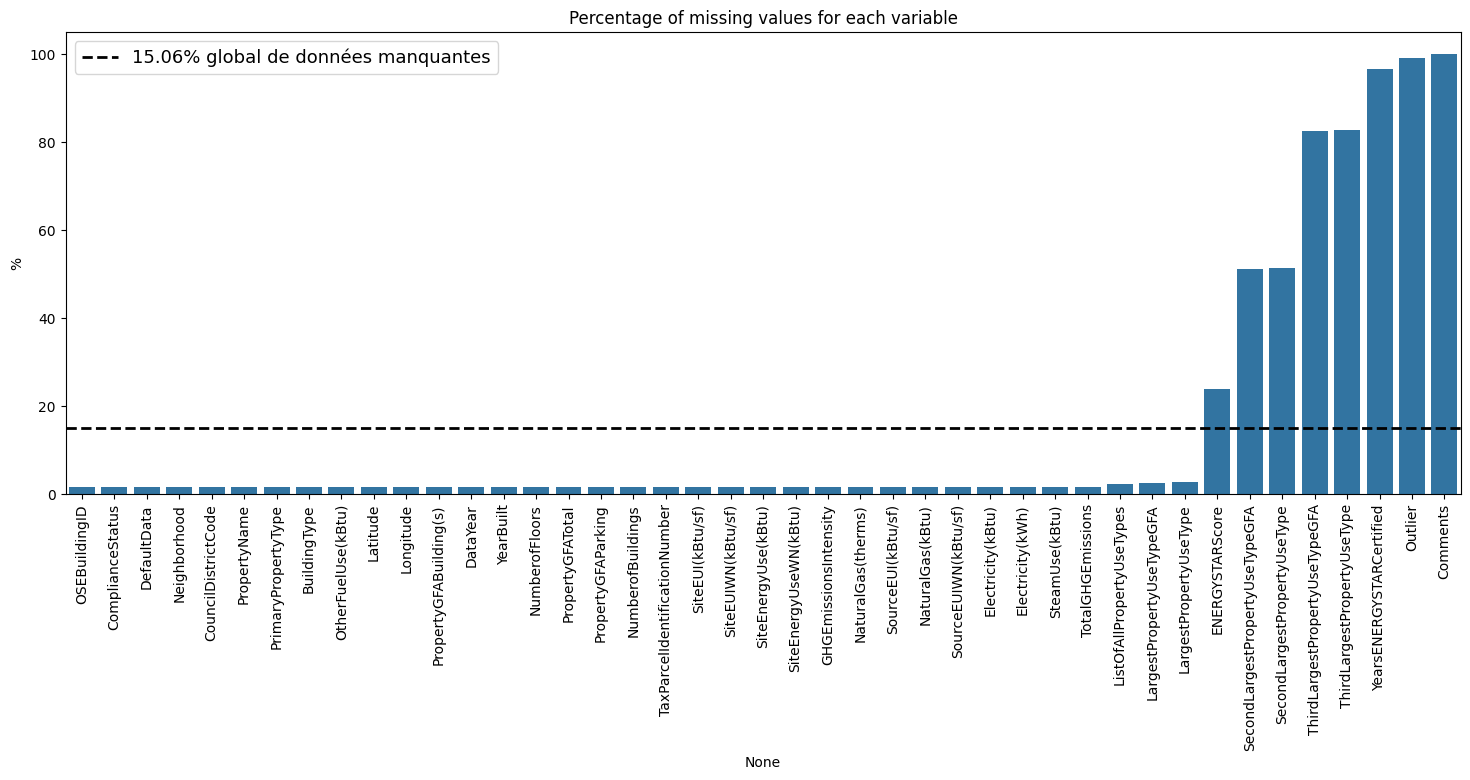

In [28]:
#We calculate the proportion of missing data for each column and plot it!
fig = plt.figure(figsize=(18, 6))

null_prop = data.isnull().sum(axis=0).sum()/len(data)/len(data.columns)*100
plt.axhline(y=null_prop, color='k', linestyle='--', lw=2)
plt.legend(['{:.2f}% global de données manquantes'.format(null_prop)], fontsize=13)

null = data.isnull().sum(axis=0).sort_values()/len(data)*100
sns.barplot(x=null.index, y=null.values)
plt.ylabel("%")
plt.title("Percentage of missing values for each variable")
plt.xticks(rotation=90)
plt.show()

####  Handling Columns with High Missing Values

#### Imputation of Some Missing Values

The columns 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', and 'ThirdLargestPropertyUseTypeGFA' contain a significant number of missing values. It is considered that buildings with missing values for these variables do not have a second and third use type. Therefore, a new category is added to the use types, and the surface values are replaced with 0.

In [29]:
# Missing values are replaced with an additional category
data["SecondLargestPropertyUseType"].fillna("Nothing", inplace=True)

# Missing values are replaced with 0
data["SecondLargestPropertyUseTypeGFA"].fillna(0, inplace=True)

In [30]:
# Missing values are replaced with an additional category
data["ThirdLargestPropertyUseType"].fillna("Nothing", inplace=True)

#Missing values are replaced with 0
data["ThirdLargestPropertyUseTypeGFA"].fillna(0, inplace=True)

#### Removal of Uninformed Variables

The columns with missing data exceeding 25% are deleted.

In [31]:
#Columns with missing data exceeding 25% are deleted
null = data.isnull().sum(axis=0).sort_values()/len(data)*100
cond = null < 25
cond = cond[cond == True]
data = data.loc[:, cond.index]

#### Removing Irrelevant Columns

In [32]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3488 entries, 1 to 49859
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ThirdLargestPropertyUseType      3488 non-null   object 
 1   SecondLargestPropertyUseType     3488 non-null   object 
 2   SecondLargestPropertyUseTypeGFA  3488 non-null   float64
 3   ThirdLargestPropertyUseTypeGFA   3488 non-null   float64
 4   OSEBuildingID                    3432 non-null   float64
 5   ComplianceStatus                 3432 non-null   object 
 6   DefaultData                      3432 non-null   object 
 7   Neighborhood                     3432 non-null   object 
 8   CouncilDistrictCode              3432 non-null   object 
 9   PropertyName                     3432 non-null   object 
 10  PrimaryPropertyType              3432 non-null   object 
 11  BuildingType                     3432 non-null   object 
 12  OtherFuelUse(kBtu)      

In [33]:
# List of columns that seem irrelevant for prediction
col_to_del = ["GHGEmissionsIntensity", 
              "NaturalGas(therms)", 
              "DataYear", 
              'TaxParcelIdentificationNumber', 
              'PropertyName']
# Removing irrelevant columns
data.drop(columns=col_to_del, inplace=True)

# New list of numerical columns
num_columns = list(data.select_dtypes(include='float64').columns)


#### Treatment of outliers and extreme values

#####  Outliers and Missing Targets.

Buildings with missing or negative target values are removed

In [34]:
for label in ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'] :
    print("Le nombre de bâtiments dont {} est manquant est de : {}".format(label, data[label].isna().sum()))
    print("Le nombre de bâtiments dont {} est <=0 est de : {}".format(label, sum(data[label]<0.0)))
    data = data[data[label]>=0.0] # Deletion of buildings with negative or zero value

Le nombre de bâtiments dont TotalGHGEmissions est manquant est de : 60
Le nombre de bâtiments dont TotalGHGEmissions est <=0 est de : 0
Le nombre de bâtiments dont SiteEnergyUse(kBtu) est manquant est de : 0
Le nombre de bâtiments dont SiteEnergyUse(kBtu) est <=0 est de : 0


Replacement of negative values for area and buildings with NaN

In [35]:
for label in ["PropertyGFAParking", "PropertyGFABuilding(s)"] :
    print("The number of buildings where {} is <0 is : {}".format(label, sum(data[label]<0.0)))
    values_to_nan = data.loc[data[label]<0, label].unique()
    data[label].replace(values_to_nan, np.nan, inplace=True)


The number of buildings where PropertyGFAParking is <0 is : 2
The number of buildings where PropertyGFABuilding(s) is <0 is : 1


We ensure that the consumption of each energy source is equal to the total consumption (with a margin of 1%)

In [36]:
list_energy = ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', "OtherFuelUse(kBtu)"]
data["diff_energy"] = abs((data[list_energy].sum(axis=1) - data["SiteEnergyUse(kBtu)"]))/(data["SiteEnergyUse(kBtu)"]+0.0001)
print("The number of buildings where the consumption of each energy source is not equal to the total consumption is : {}" \
      .format(sum(data["diff_energy"]>1e-4)))
data = data[data["diff_energy"]<1e-4]
data.drop(columns=["diff_energy"], inplace=True)

The number of buildings where the consumption of each energy source is not equal to the total consumption is : 22


####   Handling Outliers

It is interesting to observe the distributions of the target variables to identify if there are outliers in buildings, i.e., either very high or very low values

#### Energy and CO2 Variables Without Transformation

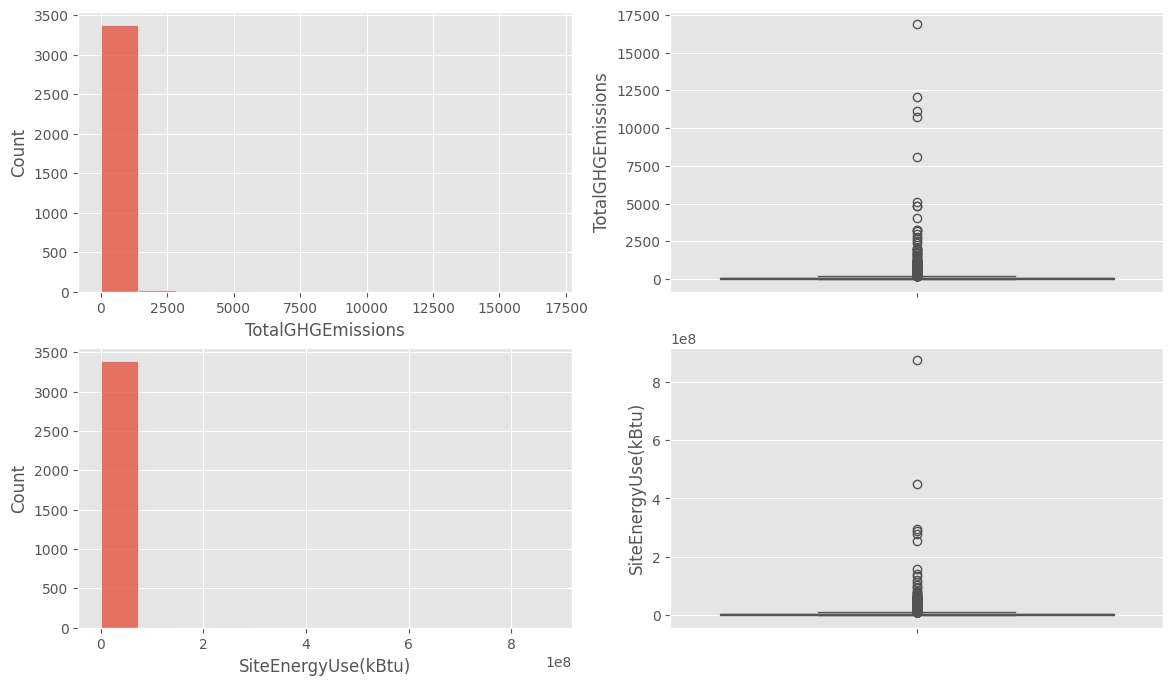

In [37]:
plt.style.use('ggplot')

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

for i, label in enumerate(["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]):
    sns.histplot(data[label], bins=int(1 + np.log2(len(data))), ax=axes[i, 0])
    sns.boxplot(data[label], orient="v", ax=axes[i, 1])

plt.show()

Buildings with high energy consumption and high CO2 emissions, in a significant number, make the distribution asymmetrical
(high-emission buildings is likely causing the data distribution to be skewed towards higher values, creating an asymmetrical shape in the histogram)

#### Energy and CO2 Variables with Logarithmic Transformation

In [38]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3406 entries, 1 to 50226
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ThirdLargestPropertyUseType      3406 non-null   object 
 1   SecondLargestPropertyUseType     3406 non-null   object 
 2   SecondLargestPropertyUseTypeGFA  3406 non-null   float64
 3   ThirdLargestPropertyUseTypeGFA   3406 non-null   float64
 4   OSEBuildingID                    3406 non-null   float64
 5   ComplianceStatus                 3351 non-null   object 
 6   DefaultData                      3351 non-null   object 
 7   Neighborhood                     3351 non-null   object 
 8   CouncilDistrictCode              3351 non-null   object 
 9   PrimaryPropertyType              3351 non-null   object 
 10  BuildingType                     3351 non-null   object 
 11  OtherFuelUse(kBtu)               3406 non-null   float64
 12  Latitude                

C:\Users\Yassine\AppData\Local\Temp\ipykernel_20516\1839272846.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[label].apply(lambda x : np.log(1 + x)), bins=int(1 + np.log2(len(data))))
C:\Users\Yassine\AppData\Local\Temp\ipykernel_20516\1839272846.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

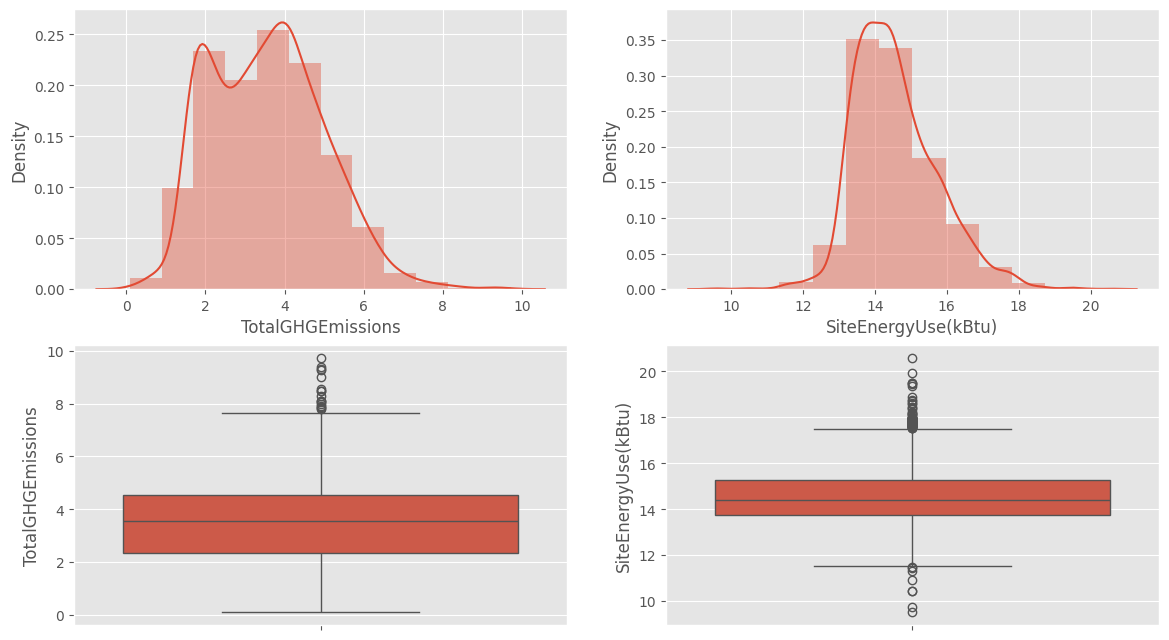

In [39]:
plt.style.use('ggplot')

fig = plt.figure(1, figsize=(14, 8))
for i,label in enumerate(["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]) :
    plt.subplot(2,2,i+1)
    sns.distplot(data[label].apply(lambda x : np.log(1 + x)), bins=int(1 + np.log2(len(data))))
    plt.subplot(2,2,i+3)
    sns.boxplot(data[label].apply(lambda x : np.log(1 + x)), orient="v")
plt.show()

Now, our target variables have 'normal' distributions, so the Tukey method can be applied to remove outliers.
It  is a common technique for identifying and removing outliers in a dataset. 
(The general steps for applying the Tukey method to remove outliers are as follows:

Calculate the first quartile (Q1) and third quartile (Q3) of the data.
Calculate the interquartile range (IQR), which is the difference between Q3 and Q1.
Define a lower threshold (Q1 - k * IQR) and an upper threshold (Q3 + k * IQR), where 'k' is a constant typically set to 1.5 or 3, depending on the level of outlier sensitivity desired.
Identify values in the data that fall below the lower threshold or above the upper threshold as outliers.
Remove or mark these outliers for further analysis.)

Calculation of IQR (Interquartile Range) for total energy

In [40]:
Q1 = round(np.percentile(data["SiteEnergyUse(kBtu)"].apply(lambda x : np.log(1 + x)), 25))
Q3 = round(np.percentile(data["SiteEnergyUse(kBtu)"].apply(lambda x : np.log(1 + x)), 75))

born_sup_energy = Q3 + 1.5*(Q3-Q1)
born_inf_energy = Q1 - 1.5*(Q3-Q1)

Calculation of IQR (Interquartile Range) for CO2 emissions

In [41]:
Q1 = round(np.percentile(data["TotalGHGEmissions"].apply(lambda x : np.log(1 + x)), 25))
Q3 = round(np.percentile(data["TotalGHGEmissions"].apply(lambda x : np.log(1 + x)), 75))

born_sup_co2 = Q3 + 1.5*(Q3-Q1) 
born_inf_co2 = Q1 - 1.5*(Q3-Q1)

Removal of outliers in total energy and CO2 emissions

In [42]:
data = data[(data["SiteEnergyUse(kBtu)"].apply(lambda x : np.log(1 + x))<born_sup_energy) & (data["SiteEnergyUse(kBtu)"].apply(lambda x : np.log(1 + x))>born_inf_energy)]
data = data[(data["TotalGHGEmissions"].apply(lambda x : np.log(1 + x))<born_sup_co2) & (data["TotalGHGEmissions"].apply(lambda x : np.log(1 + x))>born_inf_co2)]

In [43]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3137 entries, 1 to 50226
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ThirdLargestPropertyUseType      3137 non-null   object 
 1   SecondLargestPropertyUseType     3137 non-null   object 
 2   SecondLargestPropertyUseTypeGFA  3137 non-null   float64
 3   ThirdLargestPropertyUseTypeGFA   3137 non-null   float64
 4   OSEBuildingID                    3137 non-null   float64
 5   ComplianceStatus                 3090 non-null   object 
 6   DefaultData                      3090 non-null   object 
 7   Neighborhood                     3090 non-null   object 
 8   CouncilDistrictCode              3090 non-null   object 
 9   PrimaryPropertyType              3090 non-null   object 
 10  BuildingType                     3090 non-null   object 
 11  OtherFuelUse(kBtu)               3137 non-null   float64
 12  Latitude                

C:\Users\Yassine\AppData\Local\Temp\ipykernel_20516\1839272846.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[label].apply(lambda x : np.log(1 + x)), bins=int(1 + np.log2(len(data))))
C:\Users\Yassine\AppData\Local\Temp\ipykernel_20516\1839272846.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

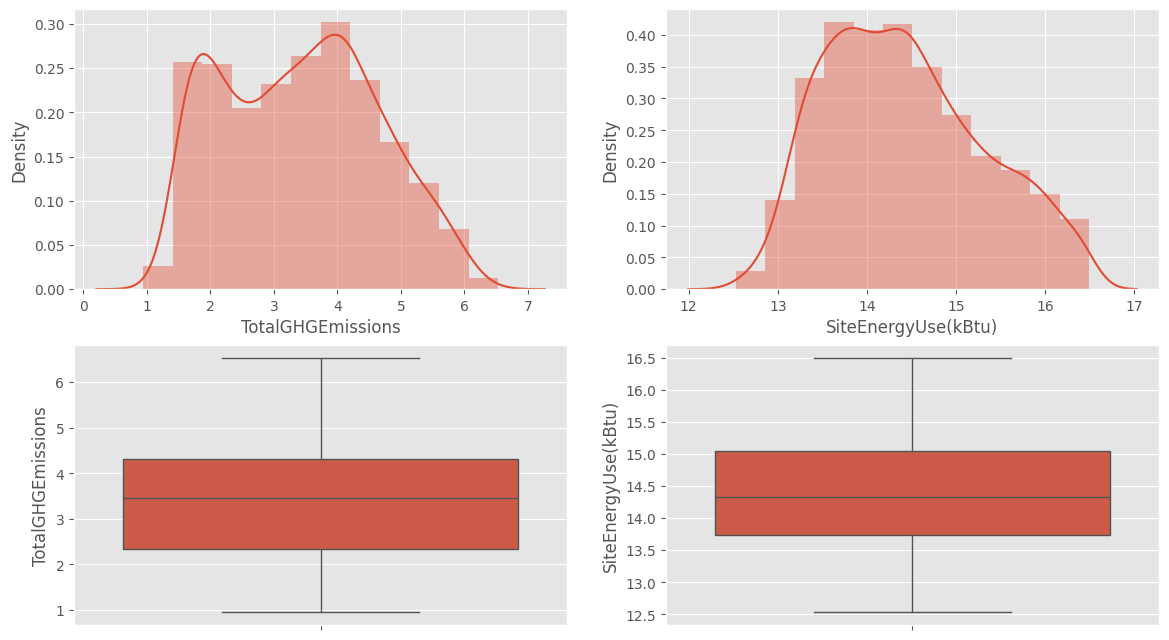

In [44]:
plt.style.use('ggplot')

fig = plt.figure(1, figsize=(14, 8))
for i,label in enumerate(["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]) :
    plt.subplot(2,2,i+1)
    sns.distplot(data[label].apply(lambda x : np.log(1 + x)), bins=int(1 + np.log2(len(data))))
    plt.subplot(2,2,i+3)
    sns.boxplot(data[label].apply(lambda x : np.log(1 + x)), orient="v")
plt.show()

In [45]:
print("The number of the remaining buildings is : {}".format(len(data)))

The number of the remaining buildings is : 3137


#### Energy Variables

In [46]:
# We retrieve the total energy and CO2 emissions
TotalEnergyUse = data["SiteEnergyUse(kBtu)"]
TotalCO2 = data["TotalGHGEmissions"]

# We calculate the proportions of each energy source
data["Electricity"] = data["Electricity(kBtu)"]/data["SiteEnergyUse(kBtu)"]
data["NaturalGas"] = data["NaturalGas(kBtu)"]/data["SiteEnergyUse(kBtu)"]
data["SteamUse"] = data["SteamUse(kBtu)"]/data["SiteEnergyUse(kBtu)"]
data["OtherFuelUse"] = data["OtherFuelUse(kBtu)"]/data["SiteEnergyUse(kBtu)"]

In [47]:
# We remove columns containing energy quantities (kBtu and kWh) and CO2 emissions
col_to_del = []
for col in data :
    if ('kBtu' in col) or  ('kWh' in col) or ('CO2' in col) :
        col_to_del.append(col)
        
data.drop(columns=col_to_del, inplace=True)

# We retrieve total energy and CO2 emissions
data["SiteEnergyUse(kBtu)"] = TotalEnergyUse
data["TotalGHGEmissions"] = TotalCO2

In [48]:
print("The number of the remaining buildings is : {}".format(len(data)))

The number of the remaining buildings is : 3137


In [49]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3137 entries, 1 to 50226
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ThirdLargestPropertyUseType      3137 non-null   object 
 1   SecondLargestPropertyUseType     3137 non-null   object 
 2   SecondLargestPropertyUseTypeGFA  3137 non-null   float64
 3   ThirdLargestPropertyUseTypeGFA   3137 non-null   float64
 4   OSEBuildingID                    3137 non-null   float64
 5   ComplianceStatus                 3090 non-null   object 
 6   DefaultData                      3090 non-null   object 
 7   Neighborhood                     3090 non-null   object 
 8   CouncilDistrictCode              3090 non-null   object 
 9   PrimaryPropertyType              3090 non-null   object 
 10  BuildingType                     3090 non-null   object 
 11  Latitude                         3090 non-null   object 
 12  Longitude               

#### Correlation Between Variables

The correlation matrix helps determine if some information is not redundant

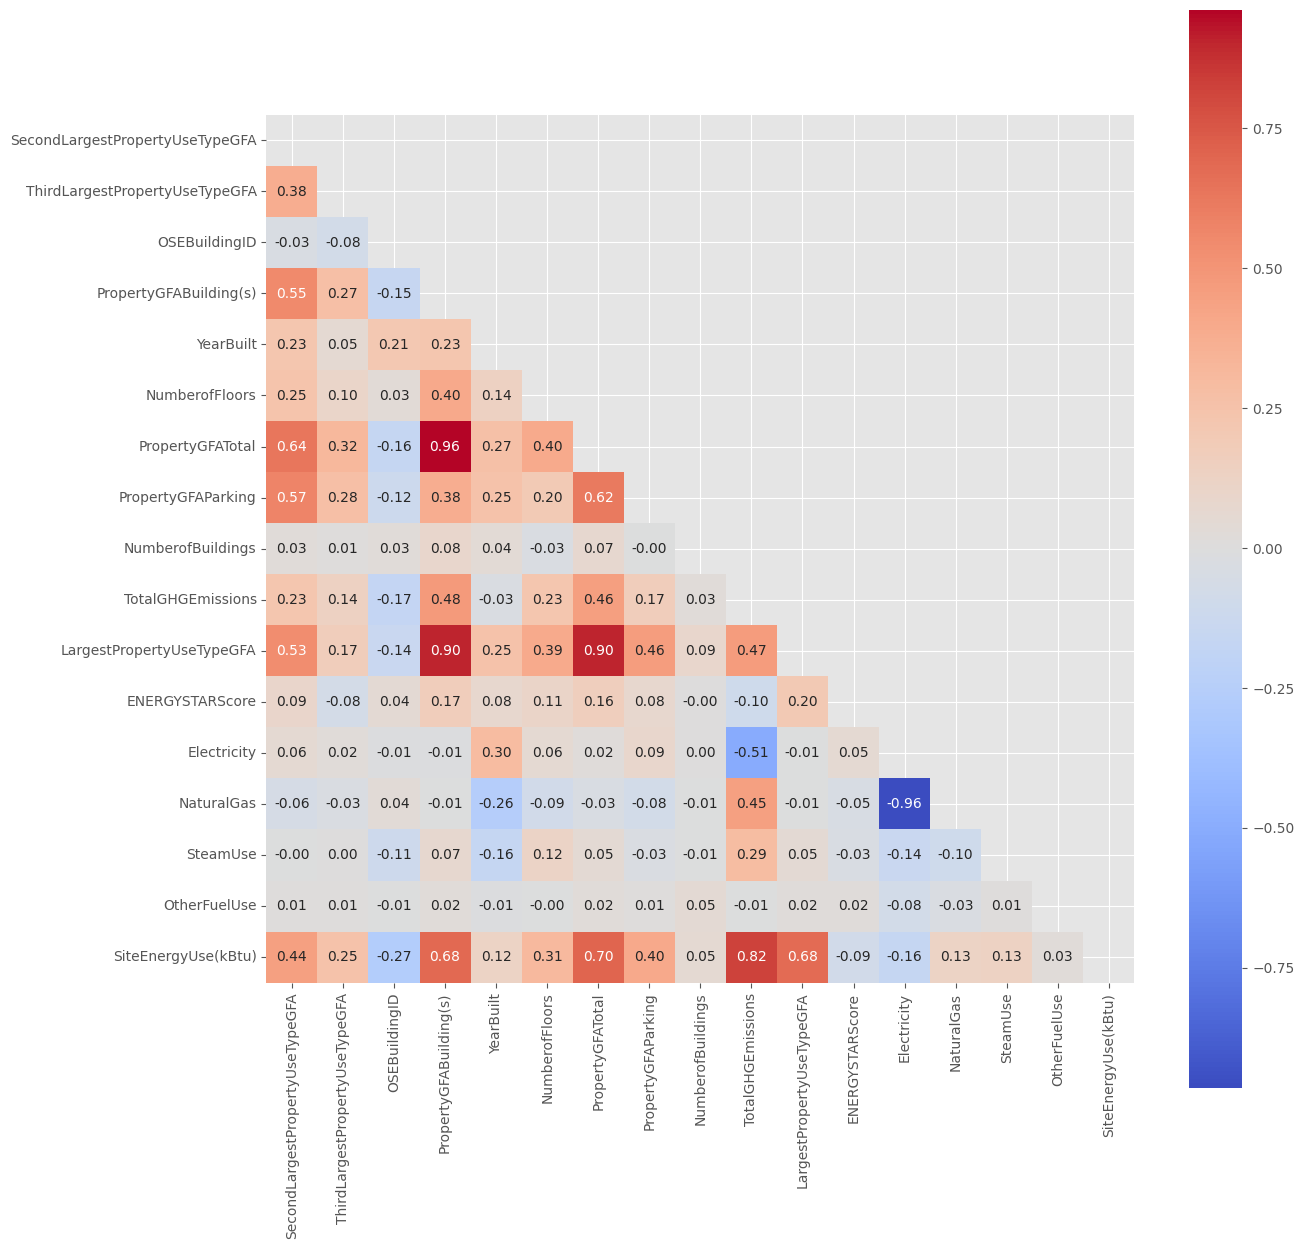

In [50]:
data = data.select_dtypes(include=[np.number])
# Handle missing values (replace with 0, but you can choose an appropriate strategy)
data.fillna(0, inplace=True)

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 14))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, square=True)

# Show the plot
plt.show()

- Total energy consumption is strongly correlated with the building area.
- CO2 emissions are strongly correlated with total energy consumption.
- The features 'LargestPropertyUseTypeGFA' and 'PropertyGFATotal' are highly correlated with 'PropertyGFABuilding(s)' and are therefore removed to avoid redundancy of information.

In [51]:
print(data.columns)


Index(['SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'OSEBuildingID', 'PropertyGFABuilding(s)', 'YearBuilt',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'NumberofBuildings', 'TotalGHGEmissions', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'Electricity', 'NaturalGas', 'SteamUse',
       'OtherFuelUse', 'SiteEnergyUse(kBtu)'],
      dtype='object')


In [52]:
# Removal of the 'LargestPropertyUseTypeGFA' and 'PropertyGFATotal' features
data.drop(columns=['LargestPropertyUseTypeGFA', 'PropertyGFATotal'], inplace=True)

##### Matrice de corrélation après suppression de doublons d'informations

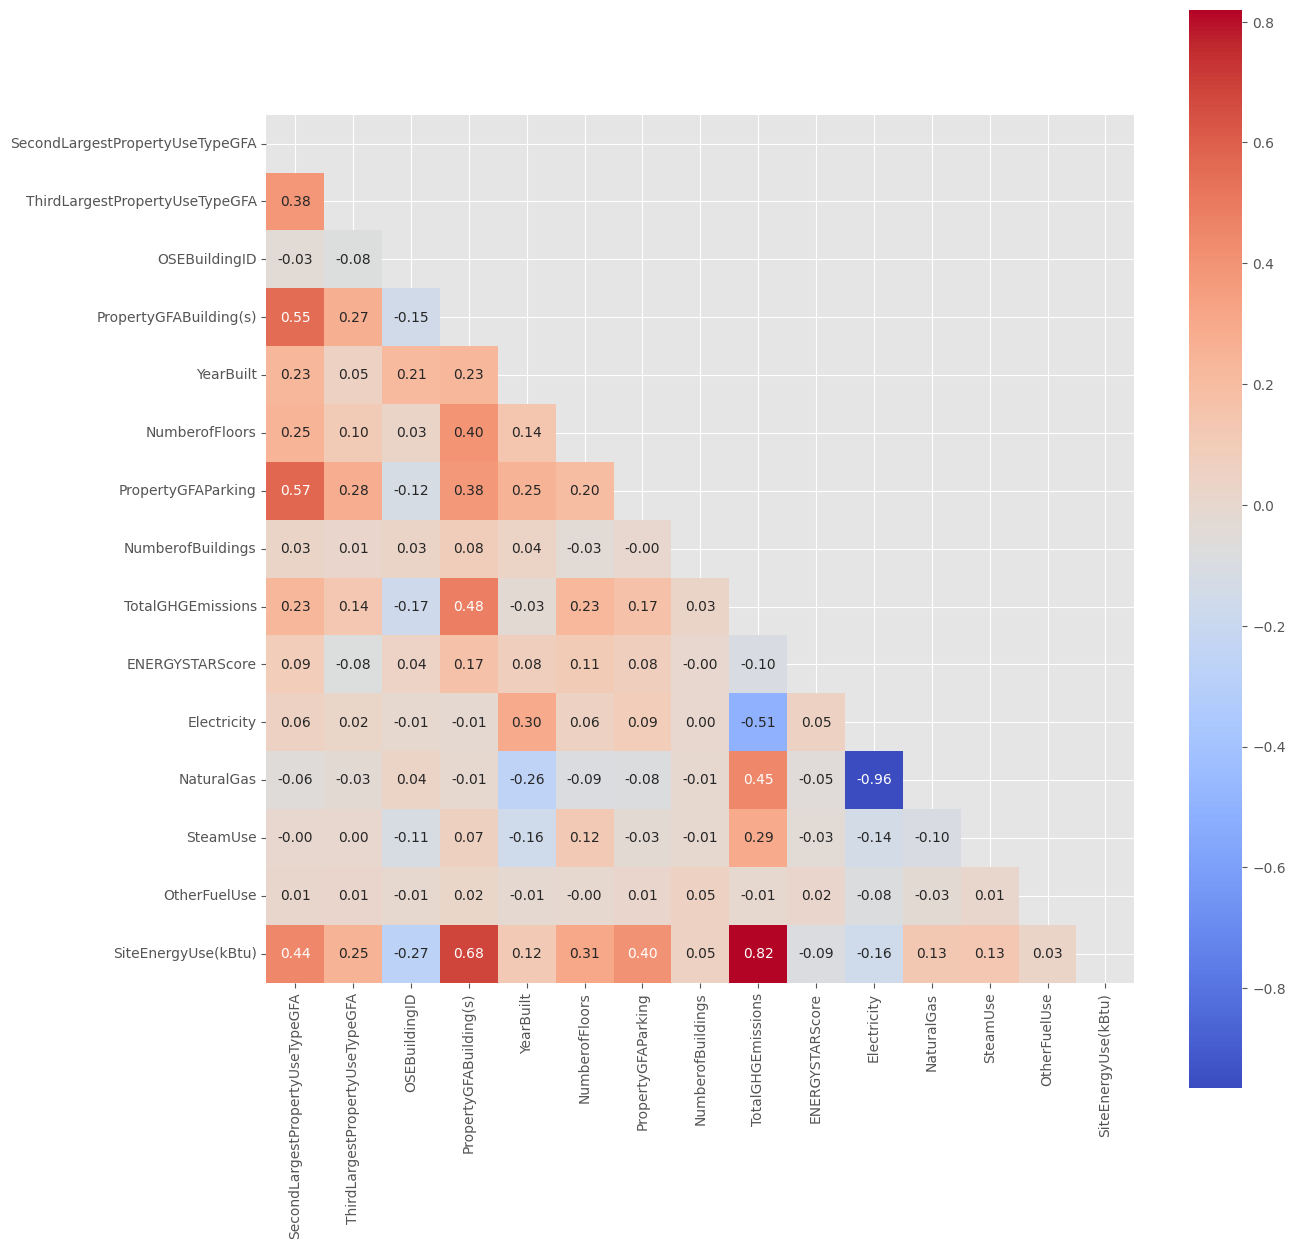

In [53]:
data = data.select_dtypes(include=[np.number])
# Handle missing values (replace with 0, but you can choose an appropriate strategy)
data.fillna(0, inplace=True)

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 14))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, square=True)

# Show the plot
plt.show()

### 3.4. Feature selection

We retrieve the names of label (to predict), categorical, and numerical variables

In [54]:
# Predictive variables
y_labels = ["SiteEnergyUse(kBtu)",
            "TotalGHGEmissions",
            'Electricity',
            'NaturalGas',
            'SteamUse',
            "OtherFuelUse"]

# Predictive variables
cat_attribs = list(data.select_dtypes(include='object').columns)

# Numerical variables
num_attribs = list(data.drop(columns=cat_attribs + y_labels + ["ENERGYSTARScore"]).columns)

#### Distribution des variables numériques

##### Indicator variables (features)

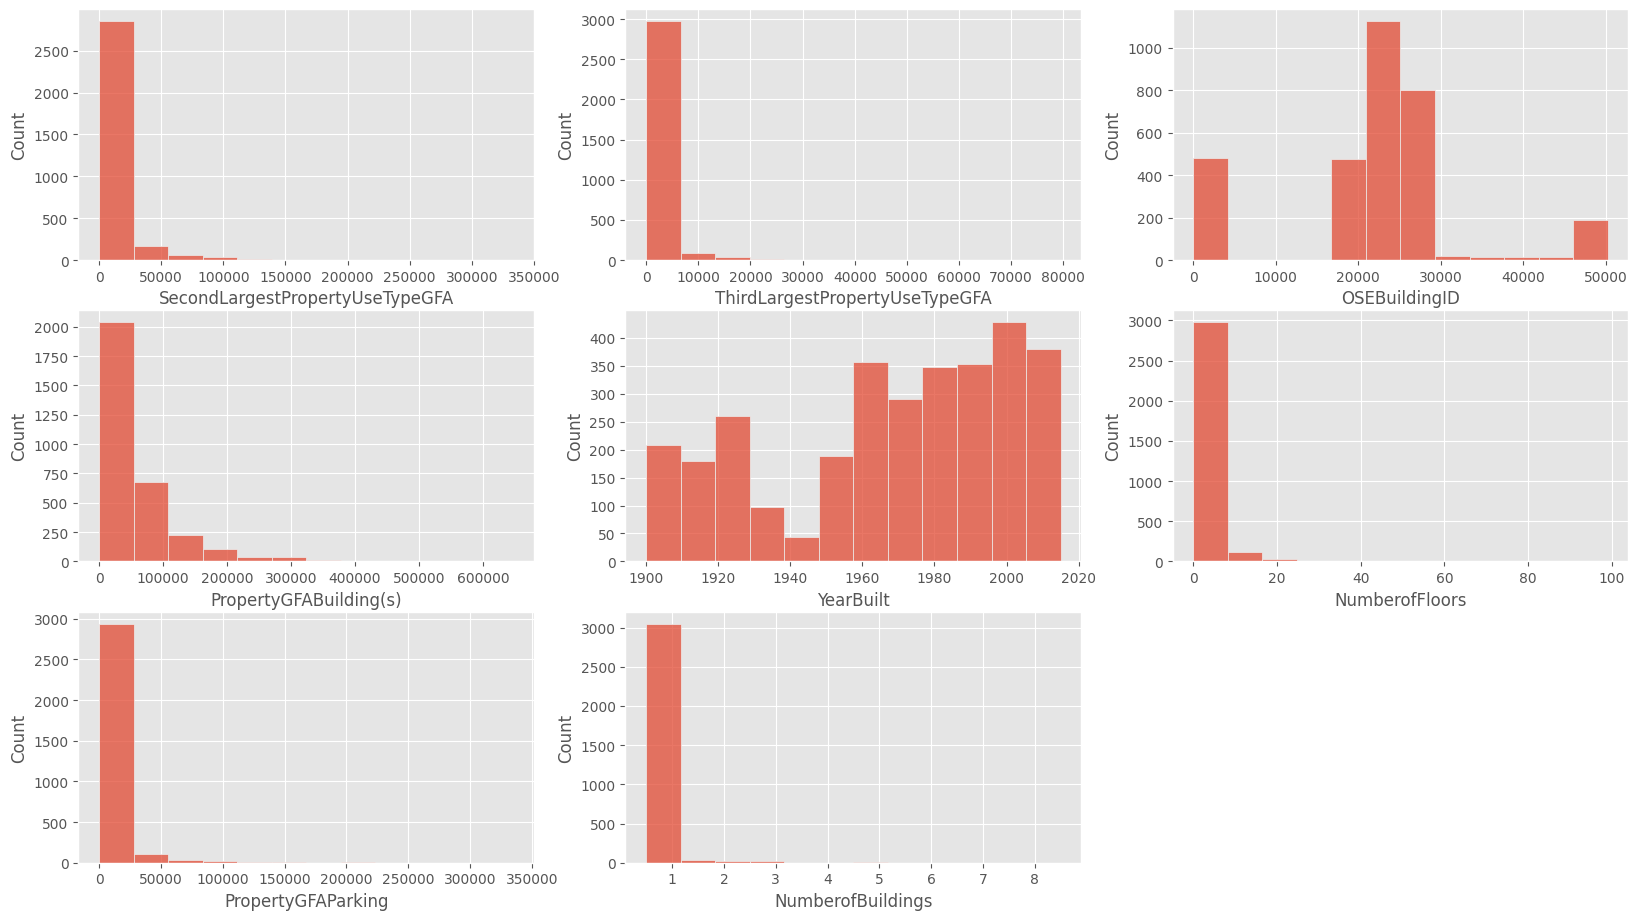

In [55]:
plt.style.use('ggplot')
fig = plt.figure(1, figsize=(20, 15))
for i, label in enumerate(num_attribs) :
    plt.subplot(4, 3, i + 1)
    sns.histplot(data[label], bins=int(1 + np.log2(len(data))))
plt.show()

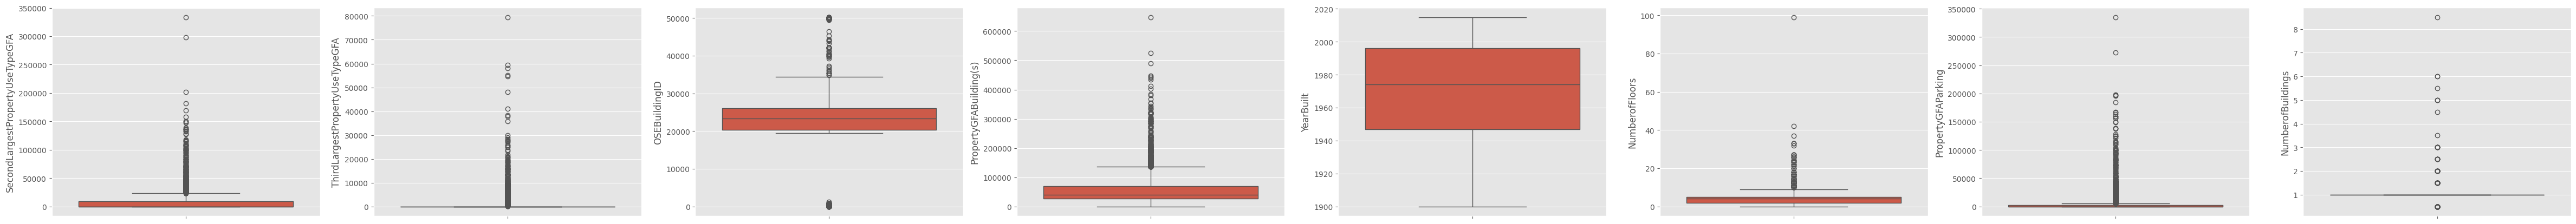

In [56]:
fig = plt.figure(1, figsize=(60, 5))
for i,label in enumerate(num_attribs) :
    plt.subplot(1,len(num_attribs), i+1)
    sns.boxplot(data[label], orient="v")
plt.show()

- The oldest buildings were constructed in 1900, and the most recent ones in 2015.
- The distribution of 'NumberofFloors' indicates the presence of single-story buildings to skyscrapers.
- Most of the individuals (in a statistical sense) in our sample of data have only one building.
- The median and the most frequent value for the number of floors is 4.

#### Variables to predict

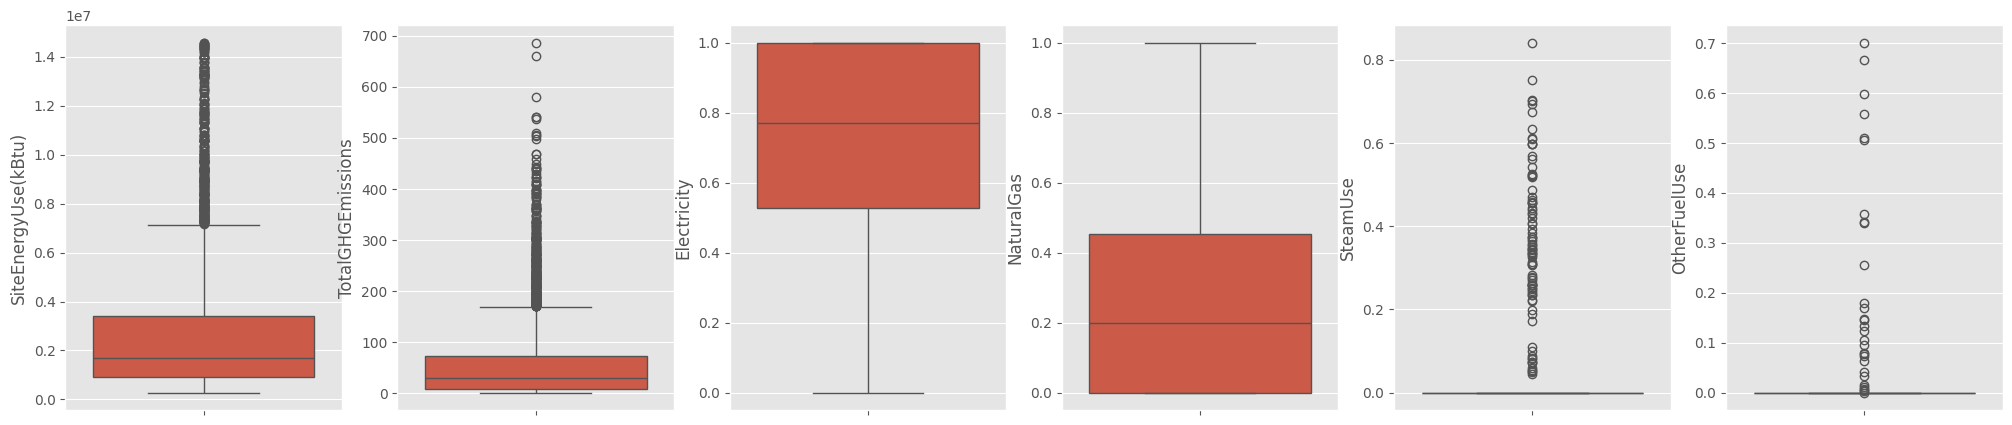

In [57]:
fig = plt.figure(1, figsize=(25, 5))
for i,label in enumerate(y_labels) :
    plt.subplot(int("1" + str(len(y_labels)) + str(i+1)))
    sns.boxplot(data[label], orient="v")
plt.show()

- Most of the buildings have almost negligible 'SteamUse' consumption. The energy balance is primarily between electricity and natural gas, with 'Steam' consumption present in a few buildings.
- Some buildings are outliers in energy consumption, and they are relatively rare, with very few buildings having consumption exceeding 1e8 kBtu.

In [58]:
# save data to csv file
data.to_csv("data_clean.csv")

#### Data preparation

#### Logarithmic transformation of the target variables

In [59]:
data.loc[:, ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]] = data.loc[:, ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]].apply(lambda x: np.log(1 + x))

#### List of categorical and numerical variables

In [60]:
# Categorical variables
cat_attribs = list(data.select_dtypes(include=['object']).columns)

# numerical variables
num_attribs = list(data.drop(columns=cat_attribs + y_labels + ["ENERGYSTARScore"]).columns)

# List of energy types
list_energy_type = ["Electricity",
                    "NaturalGas",
                    "SteamUse",
                    "OtherFuelUse"]

#### Feature Engineering
- Total area = Ground area * Number of floors

In [61]:
PropertyGFABuilding_ix, NumberofFloors_ix = 4, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin) :
    
    def __init__(self, add_GFA_per_floor_per_building=True) :
        self.add_GFA_per_floor_per_building = add_GFA_per_floor_per_building
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.add_GFA_per_floor_per_building :
            BuildingGFA_per_floor = X[:, PropertyGFABuilding_ix]*X[:, NumberofFloors_ix]
            return np.c_[X, BuildingGFA_per_floor]
        else : 
            return X 

- Boolean variables for energy

In [62]:
class AddBooleanEnergyType(BaseEstimator, TransformerMixin) :
    
    def __init__(self, add_Boolean_EnergyType=True) :
        self.add_Boolean_EnergyType = add_Boolean_EnergyType
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.add_Boolean_EnergyType :
            
            return np.array(X > 0) * 1
        else : 
            return X 